# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Syahadat'aini Renata Andriana
- **Email:** renataandriana9@gmail.com
- **ID Dicoding:** renata2306

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca terhadap rata-rata sepeda yang disewa per jam dan per hari?
- Kapan puncak jumlah penyewaan sepeda hari kerja?

## Import Semua Packages/Library yang Digunakan

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#Memanggil dataset day.csv

In [21]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#Memanggil dataset hour.csv

In [22]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Pada variabel day_df saya memanggil dataset day.csv menggunakan function read_csv() di library pandas
- Pada variabel hour_df saya memanggil dataset hour.csv menggunakan function read_csv() di library pandas

### Assessing Data

In [23]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


#Mengecek apakah ada duplikasi atau tidak

In [24]:
day_df.duplicated().sum()

0

#Melihat statistik deskriptif day.csv

In [25]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [26]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


#Mengecek apakah ada duplikasi atau tidak

In [27]:
hour_df.duplicated().sum()

0

#Melihat statistik deskriptif hour.csv

In [28]:
hour_df.describe(include ='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Insight:**
- Saya menggunakan info() untuk mengecek apa kah ada missing value atau tidak, kemudian dupliacated() untuk mengecek apakah data tersebut memiliki duplikasi atau tidak, dan describe() untuk melihat statistik deskriptif masing-masing data frame
- Pada day_df dan hour_df tidak terdapat missing value, duplikasi, dan kesalahan statistik deskriptif, tetapi pada kolom dteday pada dataset day.csv dan hour.csv tipe datanya yaitu object, yang seharusnya tipe data datetime

### Cleaning Data

#Mengubah tipe data dteday pada day_df dari object ke datetime

In [29]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [30]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

##Mengubah tipe data dteday pada hour_df dari object ke datetime

In [31]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [32]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Dengan munggunakan function to_datetime() pada library pandas kita bisa mengubah tipe data yang awalnya object menjadi datetime
- Menggunakan info() untuk memastikan apakah tipe datanya sudah berubah

## Exploratory Data Analysis (EDA)

### Explore ...

#Mngelompokkan kolom weathersit dengan cnt

#Data day_df

In [33]:
weather_day = day_df.groupby('weathersit')['cnt'].mean()
weather_day

,cnt
weathersit,
1,4876.786177
2,4035.862348
3,1803.285714


#Data hour_df

In [34]:
weather_hour = hour_df.groupby('weathersit')['cnt'].mean()
weather_hour

,cnt
weathersit,
1,204.869272
2,175.165493
3,111.579281
4,74.333333


#Mengelompokkan kolom workingday dengan cnt

#Data day_df

In [35]:
workingday_day = day_df.groupby('workingday')['cnt'].mean()
workingday_day

,cnt
workingday,
0,4330.168831
1,4584.820000


#Data hour_df

In [36]:
workingday_hour = hour_df.groupby('workingday')['cnt'].mean()
workingday_hour

,cnt
workingday,
0,181.405332
1,193.207754


**Insight:**
- Pada EDA pertanyaan 1  dan 2 kita mengelompokkan weathersit dengan cnt, yang dimana weathersit menunjukkan kondisi cuaca dan cnt yang menunjukkan jumlah total sepeda yang disewa. Dan mengelompokkan workingday dengan cnt, yang dimana workingday menunjukkan hari kerja.
- Kita menggunakan groupby untuk mengelompokkan kedua kolom tersebut, dan menggunakan mean sebagai statistik deskriptifnya. Saya menggunakan mean agar lebih mudah untuk melihat rata-rata jumlah sepedanya.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

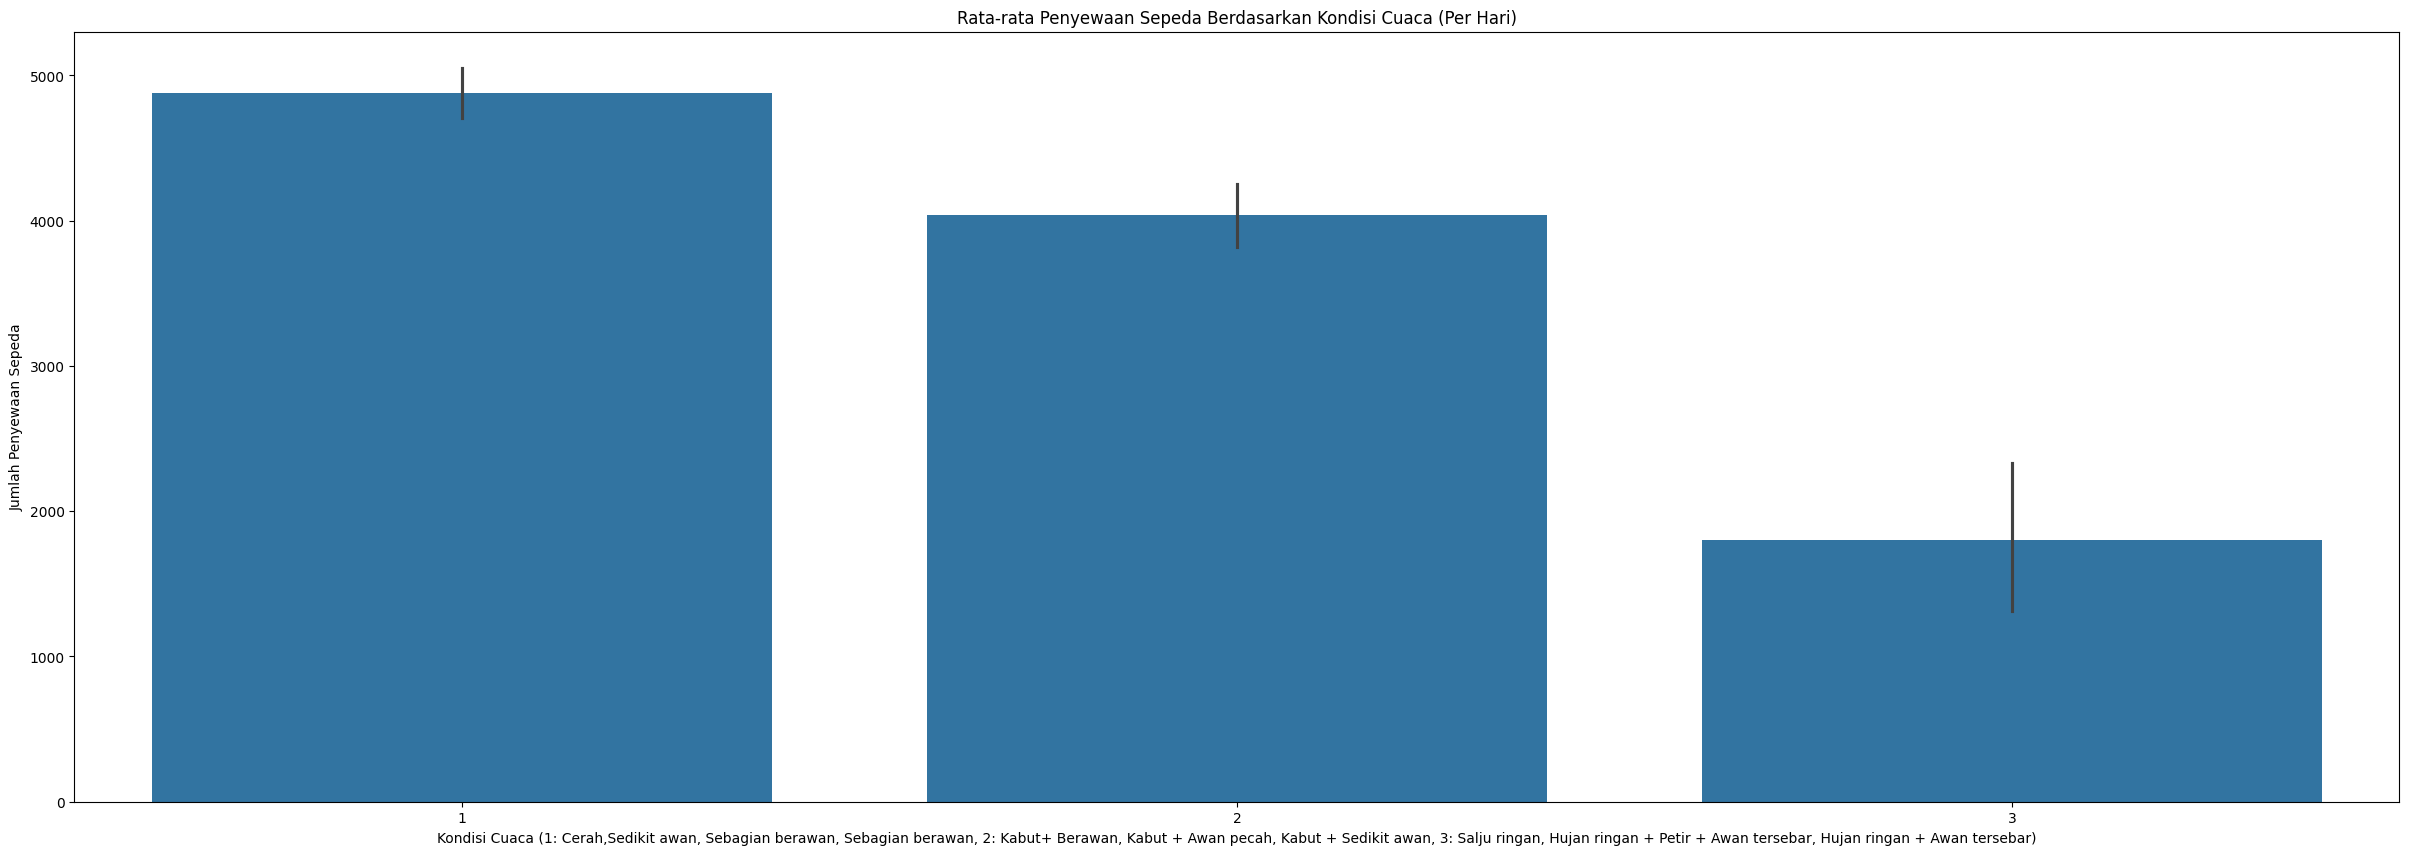

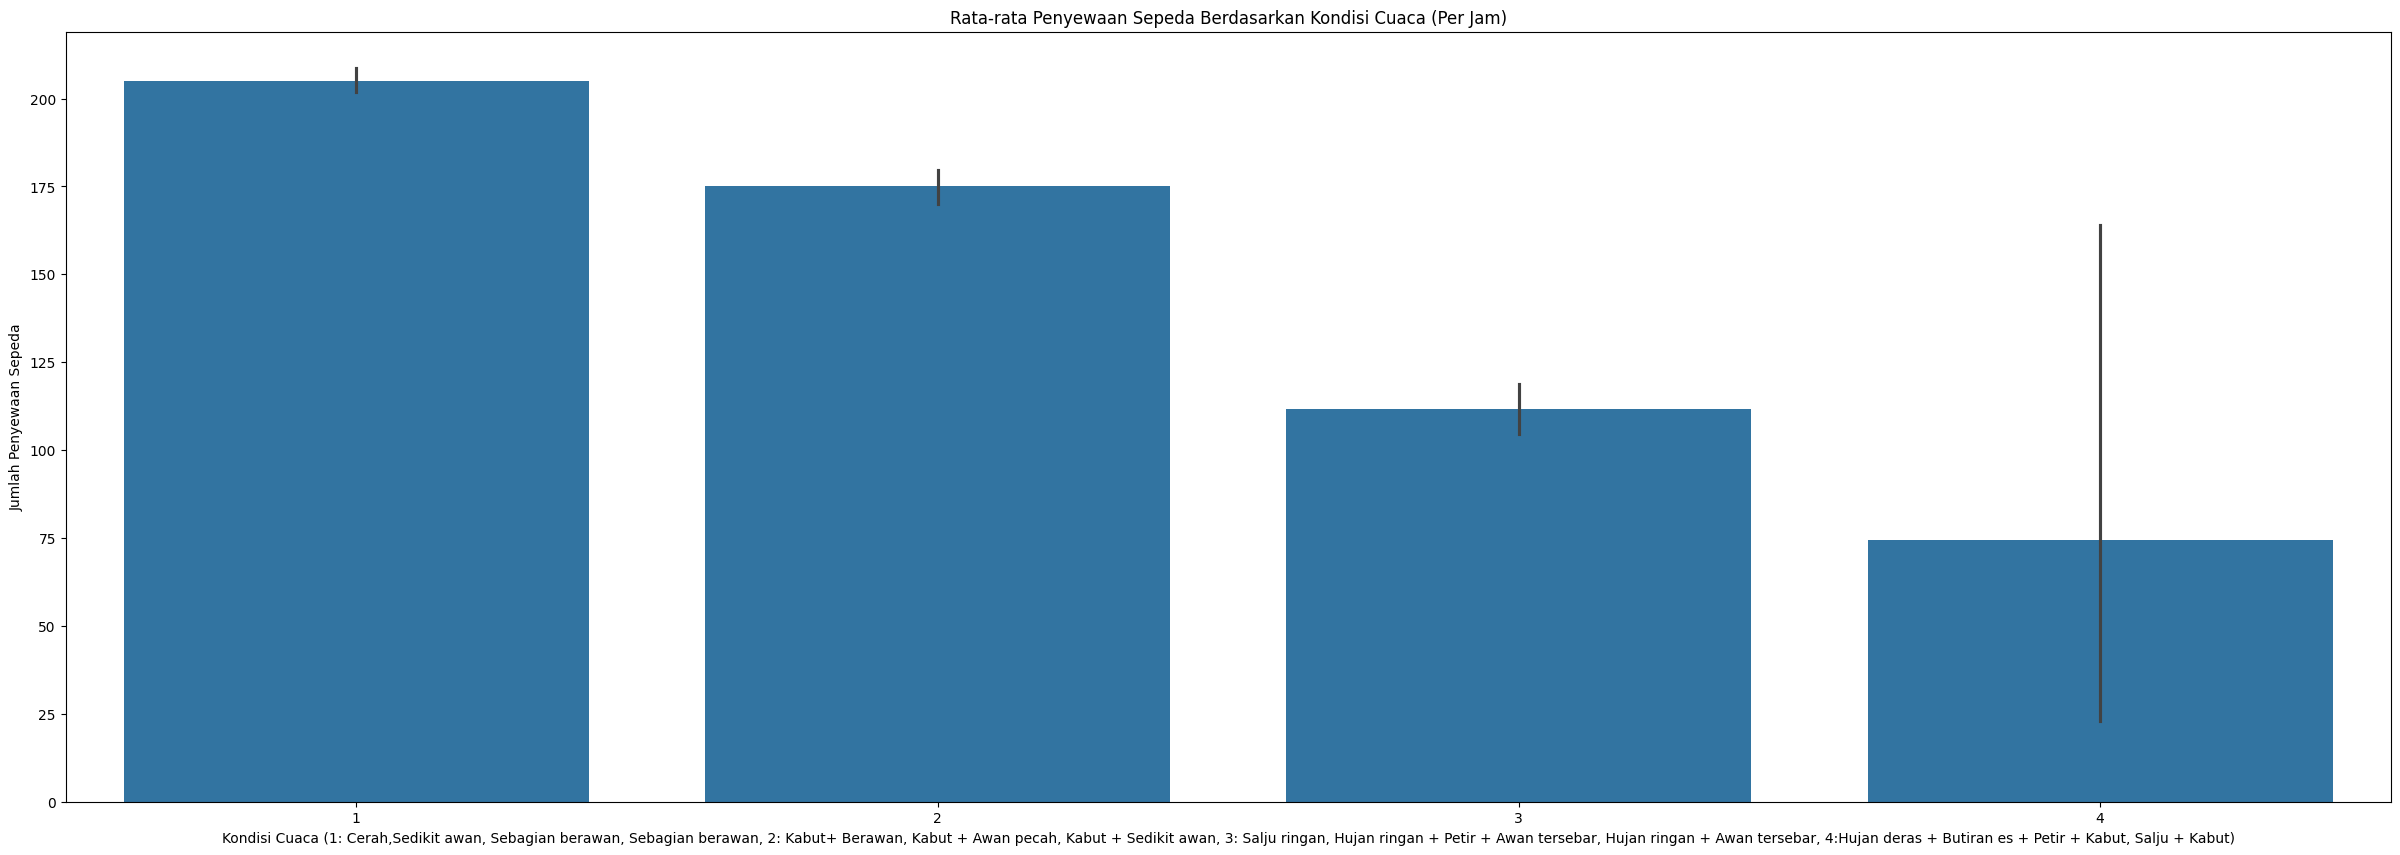

In [37]:
plt.figure(figsize=(30,10))
sns.barplot(x='weathersit', y='cnt', data=day_df, estimator='mean')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca (Per Hari)')
plt.xlabel('Kondisi Cuaca (1: Cerah,Sedikit awan, Sebagian berawan, Sebagian berawan, 2: Kabut+ Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, 3: Salju ringan, Hujan ringan + Petir + Awan tersebar, Hujan ringan + Awan tersebar)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

plt.figure(figsize=(30,10))
sns.barplot(x='weathersit', y='cnt', data=hour_df, estimator='mean')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca (Per Jam)')
plt.xlabel('Kondisi Cuaca (1: Cerah,Sedikit awan, Sebagian berawan, Sebagian berawan, 2: Kabut+ Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, 3: Salju ringan, Hujan ringan + Petir + Awan tersebar, Hujan ringan + Awan tersebar, 4:Hujan deras + Butiran es + Petir + Kabut, Salju + Kabut)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

### Pertanyaan 2:

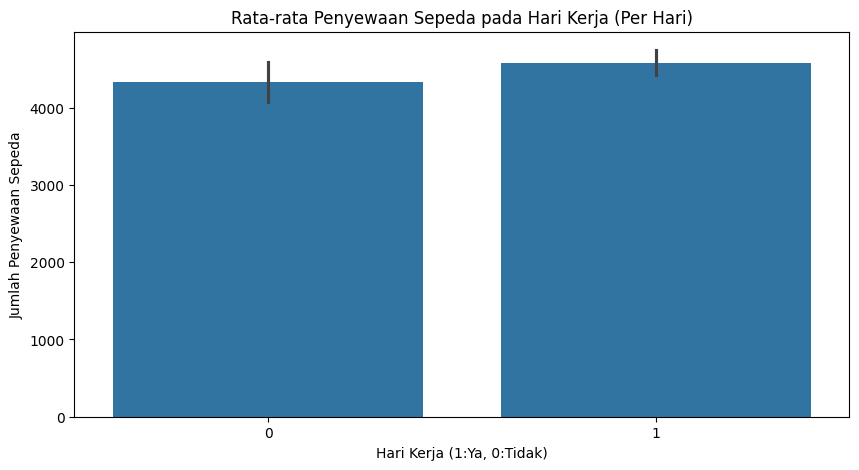

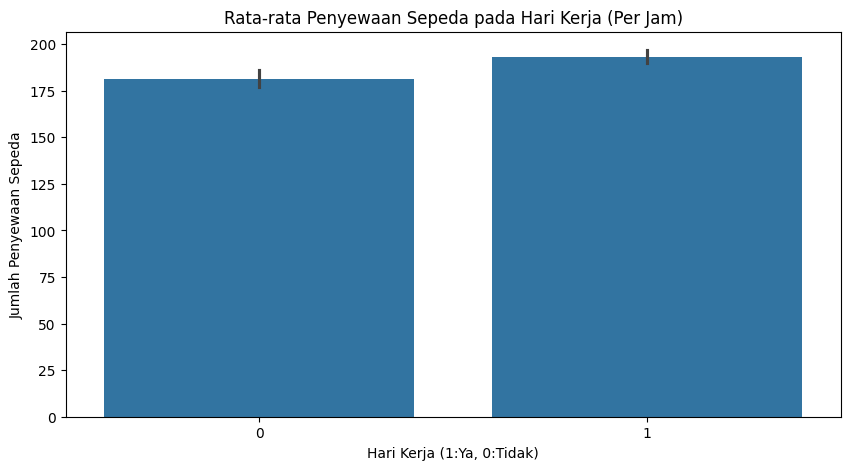

In [38]:
plt.figure(figsize=(10,5))
sns.barplot(x='workingday', y='cnt', data=day_df, estimator='mean')
plt.title('Rata-rata Penyewaan Sepeda pada Hari Kerja (Per Hari)')
plt.xlabel('Hari Kerja (1:Ya, 0:Tidak)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x='workingday', y='cnt', data=hour_df, estimator='mean')
plt.title('Rata-rata Penyewaan Sepeda pada Hari Kerja (Per Jam)')
plt.xlabel('Hari Kerja (1:Ya, 0:Tidak)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Kesimpulan pertanyaan 1 adalah pada rata-rata penyewaan sepeda perhari bisa dilihat bahwa kondisi cuaca nomor 3 paling sedikit dan kondisi cuaca nomor 1 paling banyak. Dan pada rata-rata penyewaan sepeda perjam bisa dilihat bahwa kondisi cuaca nomor 4 paling sedikit dan kondisi cuaca nomor 1 paling banyak. Hal ini menunjukkan bahwa kondisi cuaca mempengaruhi penyewaan sepeda. Semakin Bagus cuacanya semakin banyak sepeda yang disewa dan sebaliknya.
- Kesimpulan pertanyaan 2 adalah pada rata-rata penyewaan sepeda perhari bisa dilihat bahwa nomor 1 lebih banyak daripada 0. Dan pada rata-rata penyewaan sepeda perjam bisa dilihat bahwa nomor 1 lebih banyak daripada 0. Hal ini menunjukkan bahwa di hari kerja lebih banyak penyewaan sepeda daripada di hari libur. Tetapi, penyewaan sepeda di hari kerja dan hari libur tidak jauh berbeda.